# Chapter 03 신경망

퍼셉트론으로 복잡한 함수도 표현할 수 있다.

하지만 가중치를 설정하는 작업은 사람이 수동으로 해야 한다. ( 머신러닝 )

--> **신경망**으로 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습할 수 있다!! ( 딥러닝 )

---



신경망은

1. **입력층** : (0층)
2. **은닉층** : 사람 눈에 보이지 않는다 (1층)
3. **출력층** : (2층)

으로 나뉘어져 있다.


### 3.2 활성화 함수
임계값을 경계로 출력이 바뀜 --> 계단함수 (step function)

퍼셉트론에서는 활성화 함수로 계단함수를 이용한다.


---

**시그모이드 함수**

신경망에서 자주 이용하는 활성화 함수

h(x) = 1 / (1 + exp(-x))

In [154]:
# 계단 함수 구현하기
def step_function(x):  # 인수로 실수만 받음
    if x > 0:
        return 1
    else:
        return 0

import numpy as np
# 넘파이 배열도 인수(x)로 지원하기 위한 구현
def step_funtion(x):
    y = x > 0
    return y.astype(np.int)

In [125]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)

y = x > 0          # 0보다 큰 x는 True, 아니면 False로 하는 배열 y생성
y.astype(np.int)   # 자료형을 정수형으로 바꿈

[-1.  1.  2.]


array([0, 1, 1])

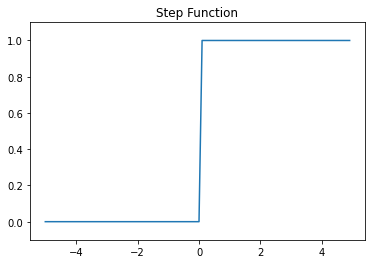

In [155]:
# step function 그리기
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)  # -5.0 ~ 5.0 까지 0.1간격으로 넘파이 배열 생성
y = step_function(x)
plt.title('Step Function')
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

In [127]:
# 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-0.1, 1.0, 2.0])
sigmoid(x)  # x가 넘파이 배열이어도 브로드캐스트 덕분에 제대로 처리한다!

array([0.47502081, 0.73105858, 0.88079708])

In [128]:
# 넘파이 브로드캐스트 복습
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


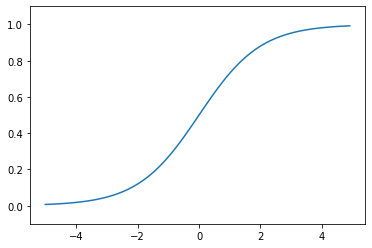

In [129]:
# 시그모이드 함수 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- 시그모이드 함수 : 매끄럽다 (연속적이다)

- 계단 함수 : 불연속적이다

둘 다 입력이 작으면 0, 커지면 1에 가까워진다.

---

시그모이드, 계단 함수 둘 다 비선형 함수이다.

선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수가 없다. --> 비선형 함수를 이용해야 한다.

**ReLU** 함수 :

입력이 0을 넘으면 그 입력 그대로 출력, 0 이하이면 0을 출력하는 함수

```
h(x) = x (x > 0)
     = 0 (x <= 0)
```



In [130]:
# ReLU 함수 구현
def relu(x):
    return np.maximum(0,x)  # np.maximum() : 두 입력 중 큰 값 반환

In [131]:
# 넘파이 다차원 배열

# 1차원
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))   # 배열의 차원 수
print(A.shape)      # 배열의 형상
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [132]:
# 2차원
B = np.array([[1,2], [3,4], [5,6]])   # 3x2 배열
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [133]:
# 행렬의 곱
A = np.array([[1,2], [3,4]])   # 행렬은 대개 대문자로 표시
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
print(np.dot(A,B))  # np.dot(): 행렬 곱

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [134]:
A = np.array([[1,2,3], [4,5,6]])
print(A.shape)
B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)
print(np.dot(A,B))
# np.dot(a,b) == a @ b == np.matmul(a,b)  행렬 곱 (사용방법, 차이점 따로 보기)

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [157]:
C = np.array([[1,2], [3,4]])
print(A.shape, C.shape)
try:
    print(np.dot(C,A))     # 행렬의 형상에 주의!
except:
    print("행렬 곱 할 수 없다")

(3, 2) (2, 2)
행렬 곱 할 수 없다


In [136]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8])
np.dot(A,B)

array([23, 53, 83])

In [137]:
# 신경망에서의 행렬 곱

X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape)

Y = np.dot(X,W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


### 3.4, 3층 신경망 구현하기

입력층 ( 0층 ), 은닉층 ( 1층, 2층 ), 출력층 ( 3층 ) 으로 구성

In [138]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

# 활성화 함수 처리
Z1 = sigmoid(A1)    # 앞에서 이미 정의했음
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [139]:
# 1충에서 2층으로 가는 과정
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [140]:
def identity_function(x):   # 출력층의 활성화 함수 (항등 함수) <- 안해도 됨 (문맥상 하는거임)
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
print(A3)
Y = identity_function(A3)   # Y = A3 과 같음
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


In [141]:
# 구현 정리

def init_network():     # 가중치, 편향을 초기화하는 함수
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):   # 입력 신호를 출력으로 변환하는 함수
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 3.5 출력층 설계하기

신경망은 분류와 회귀에 모두 이용 가능 ( 출력층에서 활성화 함수가 다름 )

- 회귀 : 항등 함수

- 분류 : 소프트맥스 함수

소프트맥스 함수 : y(k) = exp(a(k)) / sum(exp(a(i)))

--> k번째 exp 에서 모든 exp 의 합을 나눈다

In [142]:
# 소프트맥스 함수 구현하기
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [143]:
# 함수로 구현
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [166]:
# 소프트맥스 함수 구현 시 주의점: 수가 커지면 오버플로가 발생할 수 있다

a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))   # 오버플로 발생

c = np.max(a)
np.exp(a - c) / np.sum(np.exp(a - c))  # 입력값의 최대값을 빼준다 (계산값은 똑같다!)
#                                           증명은 93p. [식 3.11]에

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [145]:
# 오버플로 문제점을 보안한 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [146]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)  # 넘파이 브로드캐스트 적용
print(y)
print(np.sum(y))  # 총합 == 1

[0.01821127 0.24519181 0.73659691]
1.0


- 소프트맥스 함수 출력의 총합은 1 이다 --> 출력을 '확률' 로 해석할 수 있다.

- 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. --> 결과적으로 신경망으로 분류할 때는 소프트맥스 생략가능

- 출력층의 뉴런 수 : 분류에서는 분류하고 싶은 클래스 수로 설정한다.

### 3.6 손글씨 숫자 인식

MNIST 데이터셋 : 손글씨 숫자 이미지 집합

각 이미지 데이터는 28 x 28 크기의 이미지이며, 각 픽셀은 0~255까지의 값을 취한다.

훈련된 가중치로 추론 과정 (순전판)만 구현해서 분류하기

In [169]:
import os 
import sys

current = os.getcwd()  # 현재 디렉토리 반환
print(current)

/content/drive/My Drive/밑바닥부터시작하는딥러닝


In [170]:
path = "/content/drive/MyDrive/밑바닥부터시작하는딥러닝"
os.chdir(path)  # 현재 디렉토리를 이용 가능 (이동)
sys.path.append(os.chdir)  # 코랩에서는 안해도 되지만 하는 버릇 들이기

In [177]:
from dataset.mnist import load_mnist
# 현재 경로에서의 'dataset' 폴더에서의 mnist.py의 load_mnist함수 import

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
#                                   flatten 1차원배열로 만들지, normalize : 픽셀값을 정규화할지 ( 정규화하면 학습하기 좋다! )
#                                           one_hot_label : 레이블을 '원-핫 인코딩' 형태로 저장할지
#                                                                     : 0 or 1
print(x_train.shape)  # 훈련 이미지
print(t_train.shape)  # 훈련 레이블
print(x_test.shape)   # 시험 이미지
print(t_test.shape)   # 시험 레이블

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [176]:
a = np.array([1,2,3], dtype='uint8')
a = a * 0.21
a.dtype

dtype('float64')

5
(784,)
(28, 28)


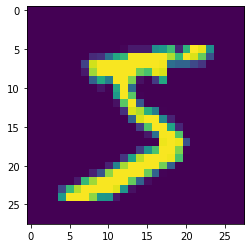

In [182]:
import numpy as np
from PIL import Image   # cv2 연습!!  / PIL 는 잘 안씀

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    #pil_img.show() : 코랩에서는 창이 안뜨기 때문에 아무것도 안나옴
    plt.imshow(pil_img)
    plt.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

MNIST 데이터셋으로 신경망 구현하기 :

입력층 뉴런을 784개 ( 28x28 ), 출력층 뉴런을 10개로 ( 레이블 수 ),

은닉층은 두 개로, 첫번째는 50개, 두번째는 100개로 임의로 지정.

In [187]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle   # 'pickle'은 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test   # 추론과정만 구현하기 때문에 test셋만 반환

def init_network():
    # 읽기 모드로 파일을 불러온다
    with open("/content/drive/MyDrive/밑바닥부터시작하는딥러닝/deep-learning-from-scratch-master/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):    # 신경망 추론 함수
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y


x, t = get_data()   # 테스트세트의 이미지, 타깃값
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):  # 10000회
    y = predict(network, x[i])
    p= np.argmax(y)     # 확률이 가장 높은 원소의 인덱스를 얻는다
    if p == t[i]:
        accuracy_cnt += 1   # 예측값과 레이블 값이 같으면 accuracy 1증가


print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # 올바르게 분류한 확률

Accuracy:0.9352


배치 처리

In [186]:
x, _ = get_data()   # x만 입력받음
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

# 형상 확인
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

# 다차원 배열의 대응하는 차원의 원소 수가 일치한다

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [189]:
x, t = get_data()
network = init_network()

# 하나로 묶은 입력 데이터를 '배치' 라고 한다
# ex) 10000회를 돌릴거를 batchsize=100으로 두면 100개를 100번돌린다 --> 효율적!
# 배치 처리를 하면 큰 배열을 효율적으로 처리할 수 있고, 버스에 주는 부하를 줄여준다

batch_size = 100    # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])


print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [152]:
x = np.array([[0.1, 0.8, 0.1],
              [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3],
              [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)    # axis=n : 인덱스=n 인 것에 대한 계산
print(y)
y = np.argmax(x, axis=0)
print(y)

[1 2 1 0]
[3 0 1]


In [153]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)   # bool배열을 만든다
np.sum(y == t)  # True인 원소의 개수를 세어준다

[ True  True False  True]


3